# EDA CASE STUDY ON LOAN DATASET


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings   
warnings.filterwarnings('ignore')

#### Reading the Dataset 

In [6]:
loanData=pd.read_csv(r"/content/loan.csv")
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Dataset Inspection

In [11]:
print(loanData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [12]:
print(loanData.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [13]:
print(loanData.shape)

(39717, 111)


**comment**


*   loanData has 111 featurs and 39717 rows
      
    * 74 features are float64
    * 13 features are int64 and
    * 24 features are object datatypes


#### Data Cleaning 


In [14]:
loanData.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
print(round(100*(loanData.isnull().sum()/len(loanData.index)),2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [17]:
null_col= loanData.isnull().sum()
null_col = null_col[null_col.values >(0.3*len(loanData))]
null_col.count()

58

Total 58 columns have missing data

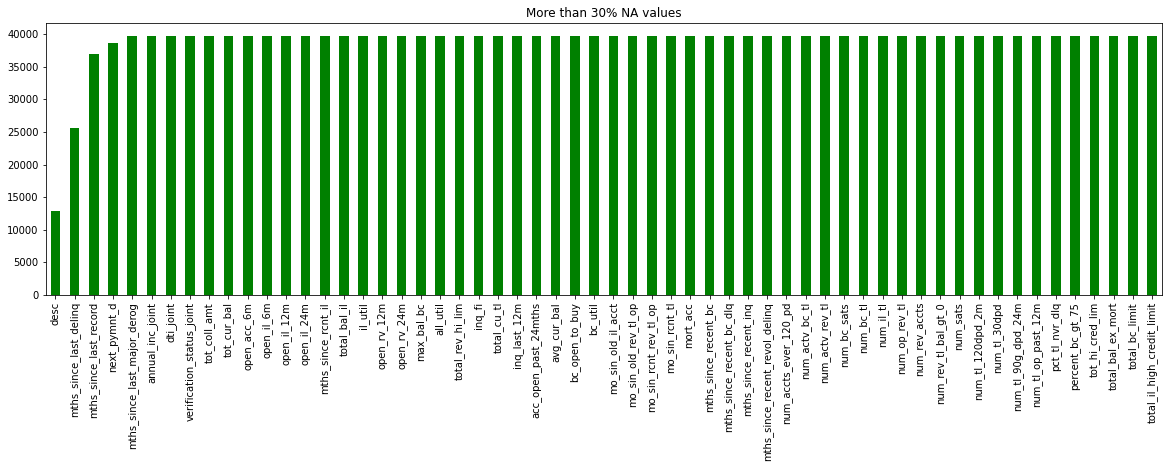

In [21]:
plt.figure(figsize=(20,5))
null_col.plot(kind='bar',color='green')
plt.title('More than 30% NA values')
plt.show()

##### Droping columns


In [23]:
loanData.drop(loanData.iloc[:,53:111],axis=1,inplace=True)

In [24]:
loanData.shape

(39717, 53)

In [26]:
null_col= loanData.isnull().sum()
null_col = null_col[null_col.values >(0.3*len(loanData))]
null_col.count()

5

In [27]:
print(round(100*(loanData.isnull().sum()/len(loanData.index)),2))

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

Still, there are some null values

In [29]:
loanData=loanData.drop(['mths_since_last_major_derog','next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1)
round(100*(loanData.isnull().sum()/len(loanData.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [30]:
#drop column on the base of unique values
uniq = loanData.nunique()
uniq = uniq[uniq.values ==1]
uniq.count

<bound method Series.count of pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
dtype: int64>

In [31]:
loanData=loanData.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type'],axis=1)
loanData.shape

(39717, 43)

In [32]:
irr_colm = ["id","member_id","zip_code"]
loanData.drop(labels = irr_colm, axis =1, inplace=True)
print(loanData.shape)

(39717, 40)


###### Replace NA with 0
        becoz self employed people has NA marked



In [33]:
print(loanData.emp_length.unique())
loanData.emp_length.fillna('0',inplace=True)
loanData.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loanData.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


Remove unnecessary values(not needed in analysis)

In [34]:
unncolms=(loanData.loan_status.value_counts()*100)/len(loanData)
unncolms

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [35]:
unncolms = unncolms[(unncolms < 1.5)]
loanData.drop(labels = loanData[loanData.loan_status.isin(unncolms.index)].index, inplace=True)
print(loanData.shape)
print(loanData.loan_status.unique())

(39717, 40)
['Fully Paid' 'Charged Off' 'Current']


#### Univeriate Analysis
- continuous variables


In [36]:
loanData['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

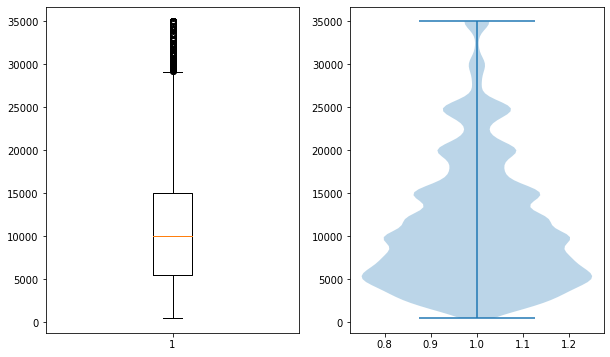

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.boxplot(loanData['loan_amnt'])

plt.subplot(122)
plt.violinplot(loanData['loan_amnt']);

- **insight** : with these 2 plots  we can observe that the avg. loan_amnt alloted is in between 5000-15000 USD.

In [38]:
loanData['int_rate'] = loanData['int_rate'].replace("%","", regex=True).astype(float)

In [39]:
loanData['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

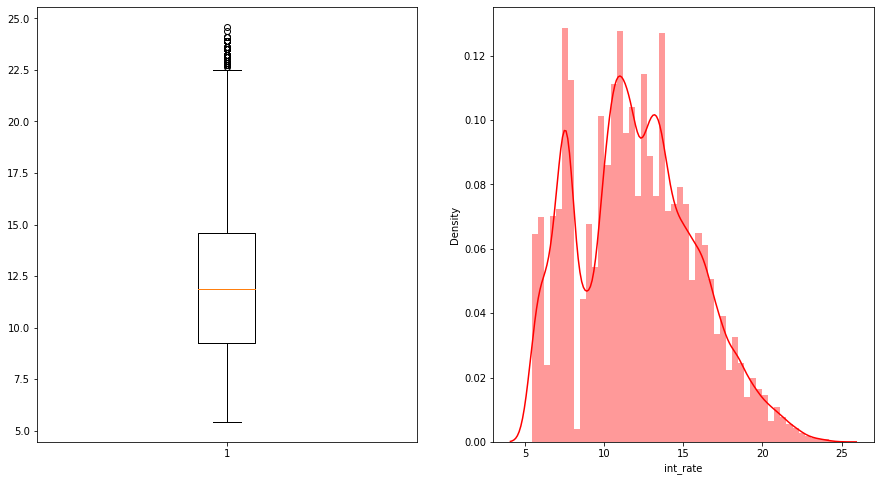

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.boxplot(loanData['int_rate'])
plt.subplot(122)
sns.distplot(loanData['int_rate'],color='red');

- most of loan is distributed at interest of 8%-14% . 

In [41]:
loanData["annual_inc"] = loanData['annual_inc'].apply(pd.to_numeric)

In [42]:
loanData.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [45]:
out = loanData["annual_inc"].quantile(0.995)
loanData = loanData[loanData["annual_inc"] < out]
loanData["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

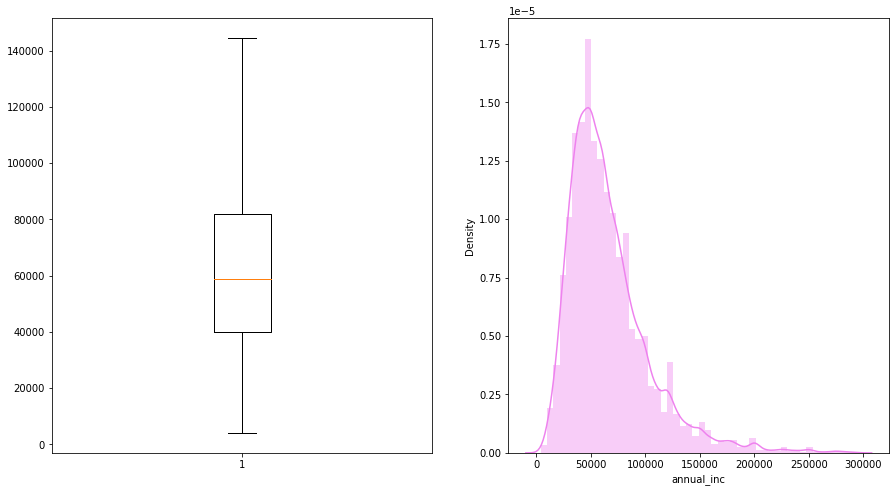

In [46]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.boxplot(loanData['annual_inc'],showfliers=False)
plt.subplot(122)
sns.distplot(loanData['annual_inc'],color='violet');

-  the avg. annual salary is between 40000-85000 USD .

##### categorical variables :

In [47]:
def univariate(df,col,vartype,hue =None):
    
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loanData))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

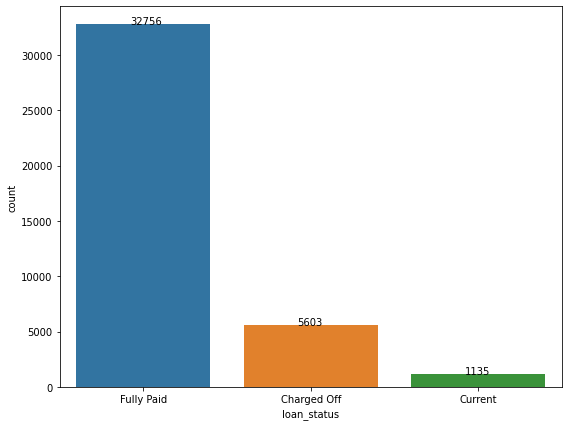

In [48]:
univariate(df=loanData,col='loan_status',vartype=1)

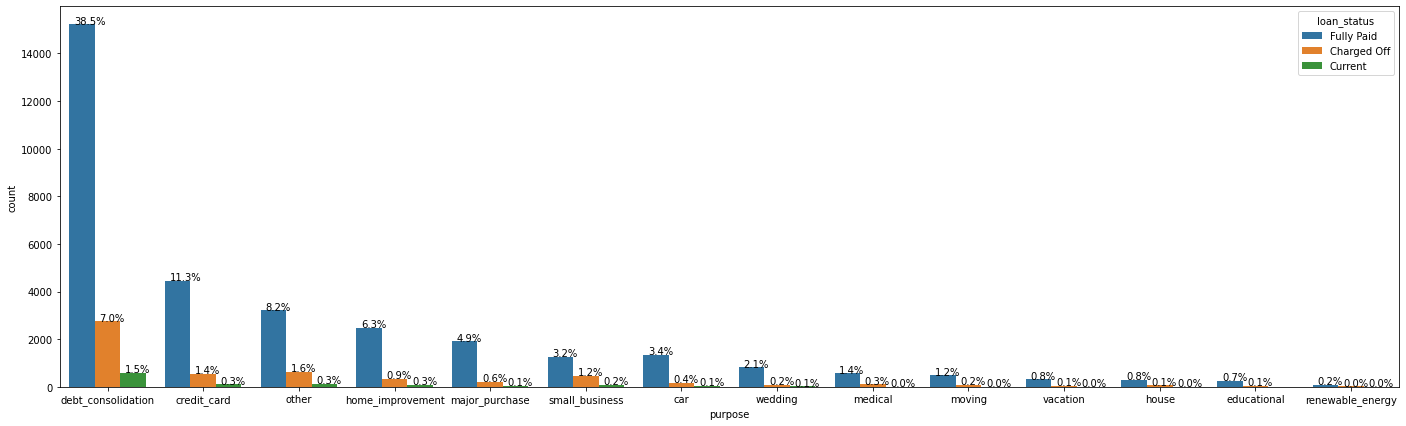

In [49]:
univariate(df=loanData,col='purpose',vartype=1,hue='loan_status')

- near about 50% of loans are in use for paying other loans .

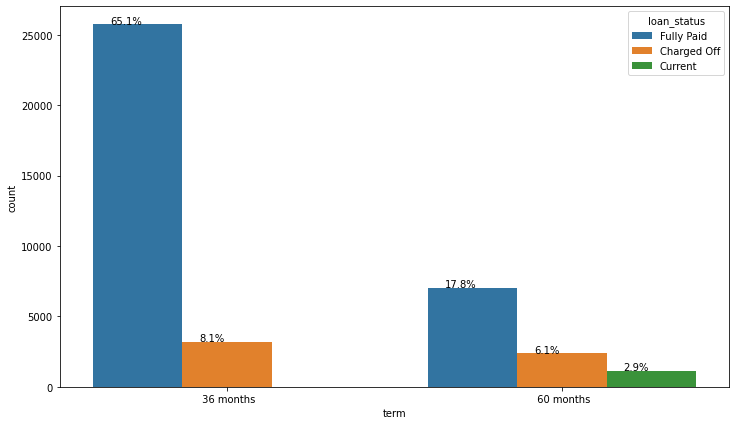

In [50]:
univariate(df=loanData,col='term',vartype=1,hue='loan_status')

- **insight** : more than 73% of applicants , doesn't want to due loan amount for long term as they pay the whole amount within 3 years. 

<Figure size 1440x720 with 0 Axes>

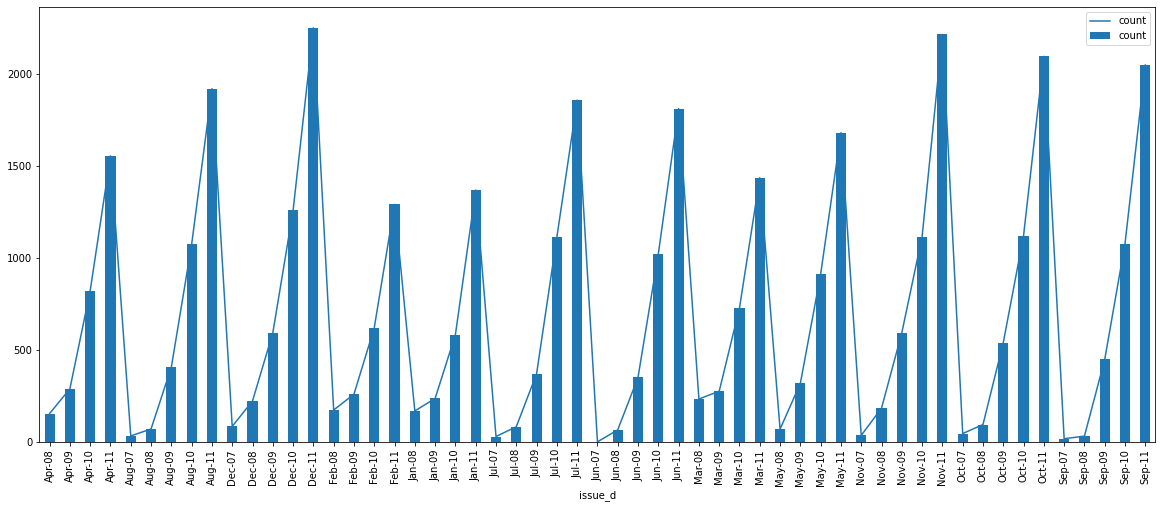

In [51]:
plt.figure(figsize=(20,10))
year_wise =loanData.groupby(by= [loanData.issue_d])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

-  we can easily observe that day by day the demand of loan is incresing .

#### Bivariate Analysis


In [52]:
loan_corr= loanData.corr()
loan_corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
loan_amnt,1.000000,0.981632,0.940030,0.307828,0.930014,0.417388,0.071792,-0.033878,0.007163,0.175393,...,0.194717,0.194398,0.885942,0.853542,0.850804,0.729833,0.045193,0.136617,0.073137,0.447957
funded_amnt,0.981632,1.000000,0.958361,0.311449,0.955920,0.413076,0.071416,-0.034144,0.007557,0.173485,...,0.196660,0.196390,0.902441,0.870033,0.868959,0.737640,0.047292,0.137349,0.074874,0.452480
funded_amnt_inv,0.940030,0.958361,1.000000,0.305506,0.904626,0.395652,0.079490,-0.040247,-0.007058,0.161072,...,0.205424,0.205427,0.880403,0.912595,0.844590,0.730681,0.027415,0.124686,0.060357,0.442693
int_rate,0.307828,0.311449,0.305506,1.000000,0.281680,0.076645,0.113580,0.157059,0.133299,0.007926,...,0.134876,0.134927,0.306517,0.301983,0.184763,0.529203,0.093067,0.123365,0.067710,0.155496
installment,0.930014,0.955920,0.904626,0.281680,1.000000,0.416689,0.059603,-0.021865,0.007883,0.170735,...,0.126603,0.126450,0.856087,0.816422,0.849444,0.634609,0.057153,0.119037,0.075555,0.400789
annual_inc,0.417388,0.413076,0.395652,0.076645,0.416689,1.000000,-0.118025,0.029974,0.036472,0.255208,...,0.061821,0.061623,0.397224,0.382205,0.399124,0.285624,0.012584,0.037754,0.023405,0.217374
dti,0.071792,0.071416,0.079490,0.113580,0.059603,-0.118025,1.000000,-0.033394,0.003785,0.290963,...,0.036344,0.036264,0.070111,0.076768,0.046379,0.110730,-0.011245,0.025379,0.012177,0.008067
delinq_2yrs,-0.033878,-0.034144,-0.040247,0.157059,-0.021865,0.029974,-0.033394,1.000000,0.007539,0.011820,...,-0.003079,-0.003276,-0.024905,-0.031160,-0.040995,0.021518,0.031058,0.011883,0.012948,-0.014294
inq_last_6mths,0.007163,0.007557,-0.007058,0.133299,0.007883,0.036472,0.003785,0.007539,1.000000,0.091296,...,-0.011778,-0.011449,-0.012471,-0.022035,-0.025706,0.021186,0.031117,0.019471,0.012747,0.027004
open_acc,0.175393,0.173485,0.161072,0.007926,0.170735,0.255208,0.290963,0.011820,0.091296,1.000000,...,0.028915,0.028738,0.160630,0.150941,0.158891,0.122192,-0.018088,0.015913,0.005600,0.078253


Text(0, 0.5, 'loan_amnt')

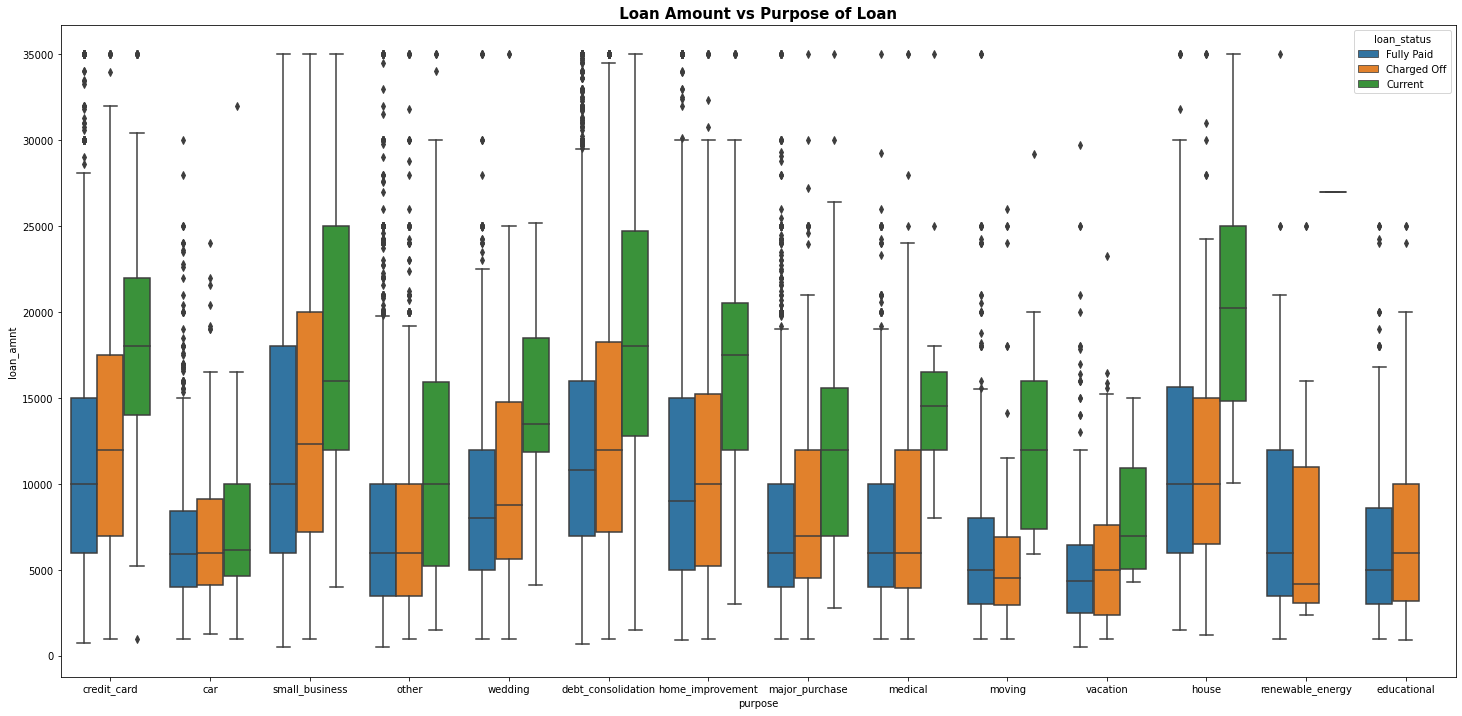

In [54]:
plt.figure(figsize=(25,12))
sns.boxplot(data =loanData, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title(' Loan Amount vs Purpose of Loan ',weight='bold',fontsize=15)
plt.xlabel('purpose',fontsize=10)
plt.ylabel('loan_amnt',fontsize=10)

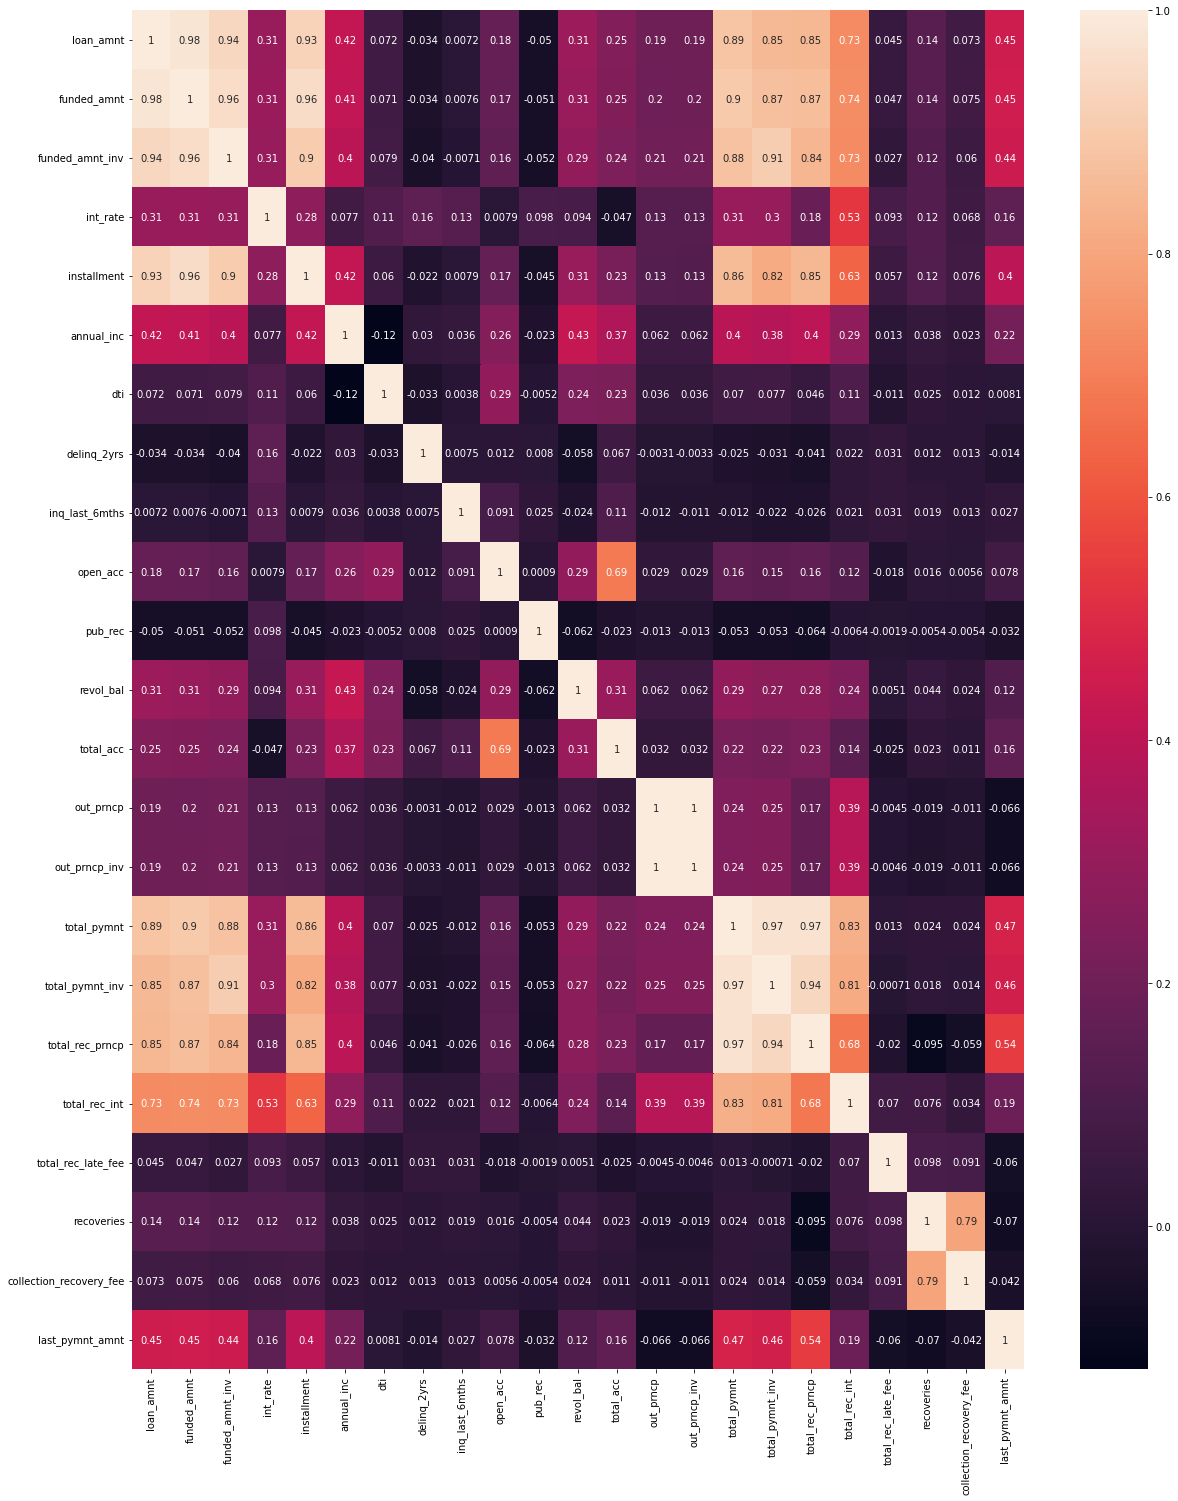

In [57]:
plt.figure(figsize=(20,25))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,annot= True);

- Now , we are creating a pivot table for better understanding .

In [58]:
lonestat_piv=loanData.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstat_piv=loanData.loc[loanData['loan_status']=='Charged Off']

Text(0, 0.5, 'Loan Amount')

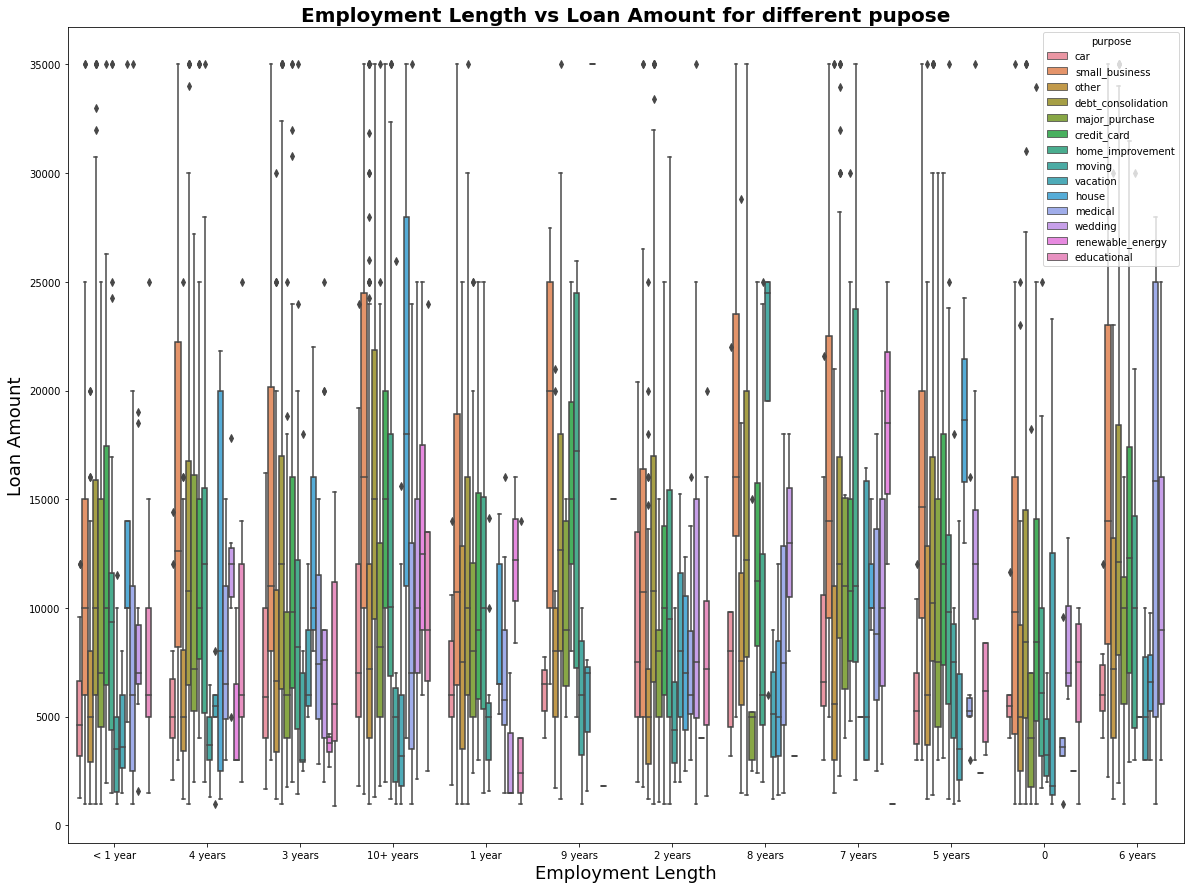

In [59]:
plt.figure(figsize=(20,15))
sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstat_piv)
plt.title('Employment Length vs Loan Amount for different pupose',fontsize=20,weight="bold")
plt.xlabel('Employment Length',fontsize=18)
plt.ylabel('Loan Amount',fontsize=18)

#### Calculating probablity of *Charged Off*


In [60]:
def crosstab(df,col):
    
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [61]:
def bivariate_prob(df,col,stacked= True):

    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,227,42,803,1072,0.212
1 year,455,71,2696,3222,0.141
10+ years,1322,389,7085,8796,0.150
2 years,565,97,3707,4369,0.129
3 years,553,83,3437,4073,0.136
4 years,458,94,2872,3424,0.134
5 years,457,87,2721,3265,0.140
6 years,305,61,1855,2221,0.137
7 years,262,62,1442,1766,0.148


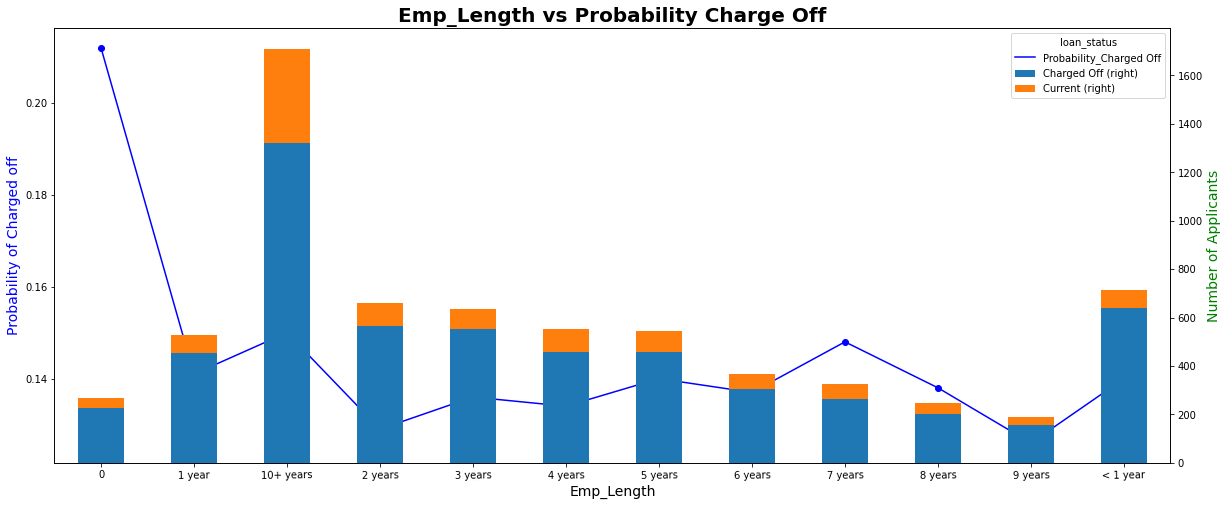

In [62]:
emp_length = crosstab(loanData,'emp_length')
display(emp_length)

bivariate_prob(df =loanData,col ='emp_length')

In [63]:
filter_states = loanData.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loanData.drop(labels = loanData[loanData.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,278,59,1497,1834,0.152
NM,30,5,151,186,0.161
NV,107,17,369,493,0.217
NY,492,113,3181,3786,0.130
OH,153,45,1022,1220,0.125
OK,40,12,247,299,0.134
OR,71,16,364,451,0.157
PA,179,49,1285,1513,0.118
RI,25,4,167,196,0.128


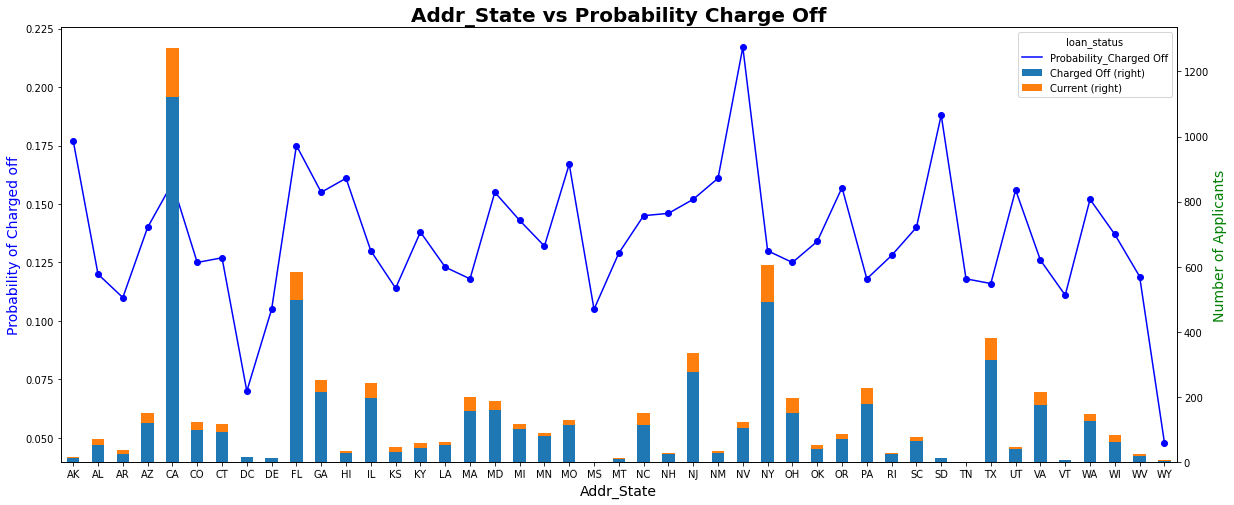

In [64]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,160,50,1337,1547,0.103
credit_card,541,103,4466,5110,0.106
debt_consolidation,2760,585,15215,18560,0.149
educational,56,0,268,324,0.173
home_improvement,341,99,2483,2923,0.117
house,59,14,302,375,0.157
major_purchase,220,37,1919,2176,0.101
medical,106,12,571,689,0.154
moving,91,7,480,578,0.157


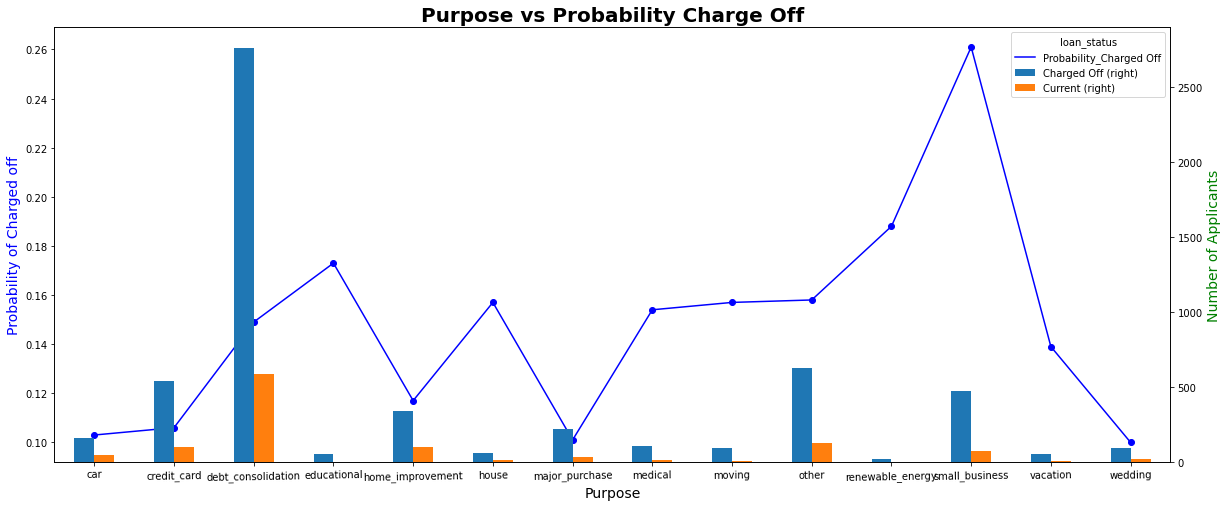

In [65]:
purpose = crosstab(loanData,'purpose')
display(purpose)

bivariate_prob(df =loanData,col ='purpose',stacked=False)

'annual_inc'

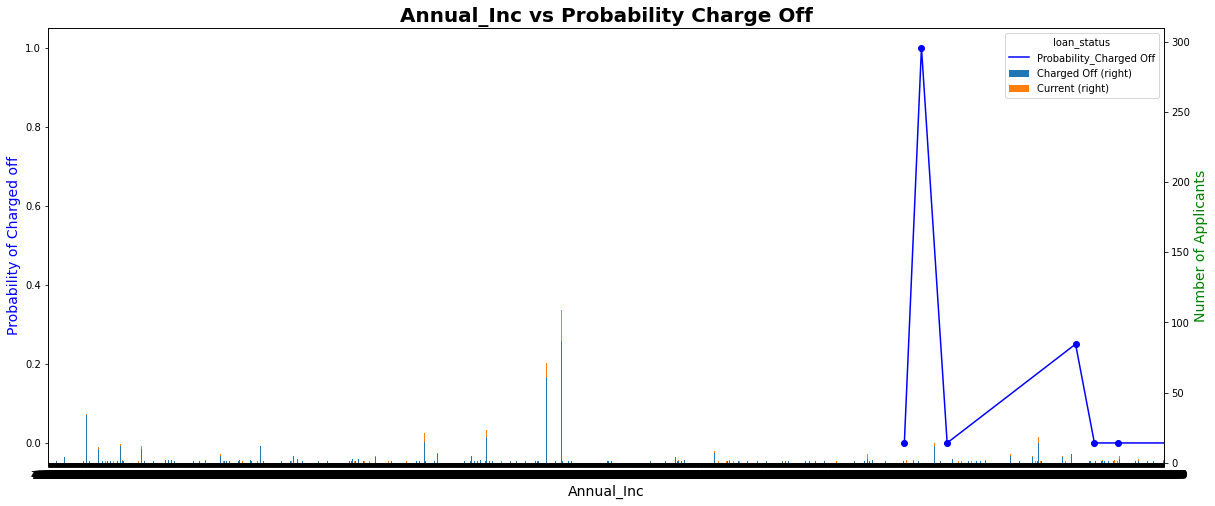

In [66]:
annual_inc = crosstab(loanData,'annual_inc')
display('annual_inc')

bivariate_prob(df =loanData,col ='annual_inc')

'int_rate'

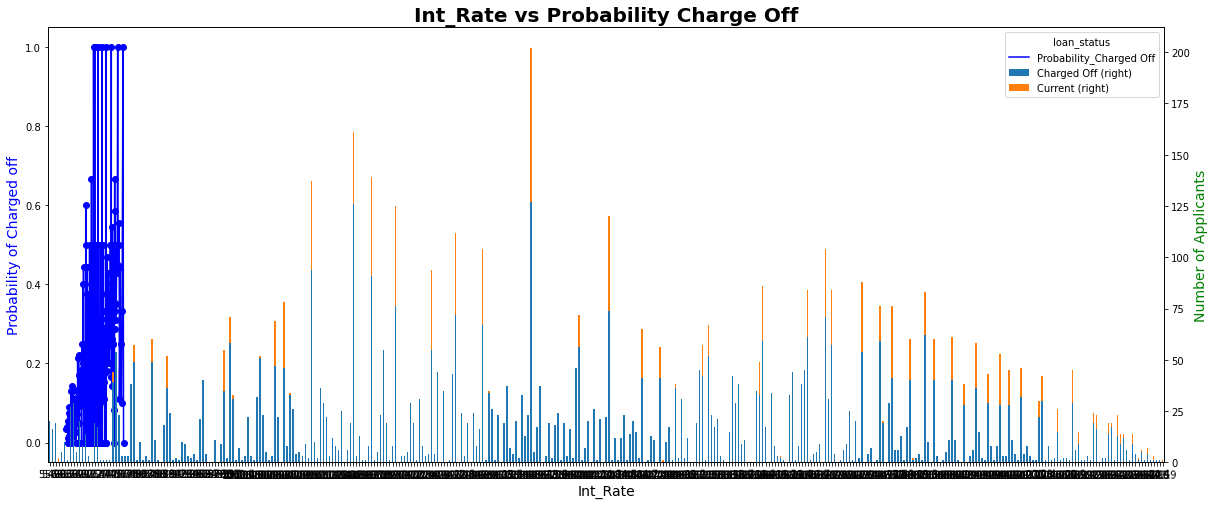

In [67]:
int_rate=crosstab(loanData,'int_rate')
display('int_rate')

bivariate_prob(df =loanData,col ='int_rate')
